# Try Keras
This is the starter notebook for the [Try Keras](https://www.codingforentrepreneurs.com/projects/try-keras) tutorial series.
[Run on Google Colab](https://colab.research.google.com/github/codingforentrepreneurs/Try-Keras/blob/master/notebooks/Try_Keras_Start_Here.ipynb)

## Download and Unzip our Dataset

We have provided the starter dataset for this series. You can always use your own dataset once you get the basics and you can use a lot of the methods below download and unzip your dataset too.

All datasets are available on [this repo](https://github.com/codingforentrepreneurs/Try-Keras). Datasets were generated using [Tight.ai Desktop](https://tight.ai) _coming soon_.

In [ ]:
DATASET_NAME = "hot-dog-v-not-hot-dog"
DATASET_ZIP = f"{DATASET_NAME}.zip"
DATASET_URL = f"https://s3.amazonaws.com/datasets.tight.ai/tutorials/try-keras/{DATASET_ZIP}"

Let's just run a bash script `!` to repeat `echo` the python variable `DATASET_URL` from above by using `$DATASET_URL`.

In [ ]:
!echo $DATASET_URL

https://s3.amazonaws.com/datasets.tight.ai/tutorials/try-keras/hot-dog-v-not-hot-dog.zip


Here we'll use a bash script `!` to download the file `wget` and the newest version `-N` using the python variable from above with `$DATASET_URL`.

In [ ]:
!wget -N $DATASET_URL

--2020-08-14 03:41:49--  https://s3.amazonaws.com/datasets.tight.ai/tutorials/try-keras/hot-dog-v-not-hot-dog.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.37.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.37.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141058151 (135M) [application/zip]
Saving to: ‘hot-dog-v-not-hot-dog.zip’

hot-dog-v-not-hot-d 100%[===================>] 134.52M  84.7MB/s    in 1.6s    

2020-08-14 03:41:50 (84.7 MB/s) - ‘hot-dog-v-not-hot-dog.zip’ saved [141058151/141058151]



In [ ]:
# !unzip -h

Now we'll run a bash script `!` to unzip `!unzip`  and update files (if neccessary) quietly `-uq` from the python variable name `DATASET_NAME` as `$DATASET_NAME` with our destination `-d` being our current directory `.`.

In [ ]:
!unzip -uq $DATASET_ZIP -d "."

Now let's review, with a bash script `!`, our current directory `ls` to ensure our zip file `$DATASET_ZIP` was unpacked and our `DATASET_NAME` is visable as a directory:

In [ ]:
!ls

hot-dog-v-not-hot-dog  hot-dog-v-not-hot-dog.zip  __MACOSX  sample_data


## Review Dataset

In [ ]:
import pathlib
import pandas as pd

In [ ]:
BASE_DIR = pathlib.Path().resolve() # os.getcwd()
BASE_DIR

PosixPath('/content')

In [ ]:
DATASET_DIR = BASE_DIR / DATASET_NAME
print(DATASET_DIR, DATASET_DIR.exists())

/content/hot-dog-v-not-hot-dog True


In [ ]:
# DATASET_DIR = os.path.join(BASE_DIR, DATASET_NAME)
# print(DATASET_DIR, os.path.exists(DATASET_DIR))

In [ ]:
DATASET_CSV = DATASET_DIR / 'dataset.csv'

In [ ]:
df = pd.read_csv(DATASET_CSV)
df.head()

,path,extension,height,width,tags,removed,timestamp
0,data/1.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09
1,data/2.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09
2,data/3.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09
3,data/4.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09
4,data/5.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09


In [ ]:
df.shape

(731, 7)

#### Create the *Local* Path Column

In [ ]:
df['local_path'] = df['path']
df.head()

,path,extension,height,width,tags,removed,timestamp,local_path
0,data/1.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/1.jpg
1,data/2.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/2.jpg
2,data/3.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/3.jpg
3,data/4.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/4.jpg
4,data/5.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/5.jpg


In [ ]:
# def change_to_abs_path(row_val):
#   return str(DATASET_DIR / row_val)
df['local_path'] = df['local_path'].apply(lambda x: str(DATASET_DIR / x))

In [ ]:
df.head()

,path,extension,height,width,tags,removed,timestamp,local_path
0,data/1.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/1.jpg
1,data/2.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/2.jpg
2,data/3.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/3.jpg
3,data/4.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/4.jpg
4,data/5.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/5.jpg


#### Preview Random Image

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df.tags.value_counts()

Not Hot Dog    440
Hot Dog        291
Name: tags, dtype: int64

In [ ]:
random_row = df.sample()
random_row

,path,extension,height,width,tags,removed,timestamp,local_path
143,data/145.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/145.jpg


In [ ]:
local_random_img_path = random_row['local_path'].values[0]
local_random_img_tag = random_row['tags'].values[0]

print(local_random_img_path, local_random_img_tag)

/content/hot-dog-v-not-hot-dog/data/145.jpg Hot Dog


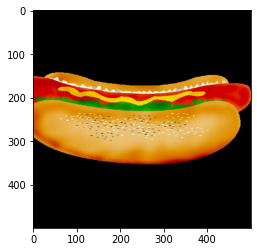

Hot Dog


In [ ]:
pil_img = Image.open(local_random_img_path)
img_array = np.asarray(pil_img)
plt.imshow(img_array)
plt.show()
print(local_random_img_tag)

In [ ]:
def preview_img_randomly():
    random_row = df.sample()
    local_random_img_path = random_row['local_path'].values[0]
    local_random_img_tag = random_row['tags'].values[0]
    pil_img = Image.open(local_random_img_path)
    img_array = np.asarray(pil_img)
    print(local_random_img_tag)
    plt.imshow(img_array)
    plt.show()
    

Not Hot Dog


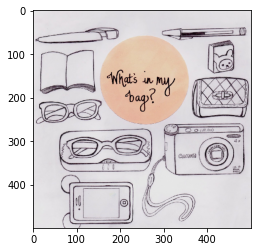

Hot Dog


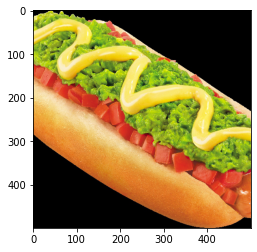

Not Hot Dog


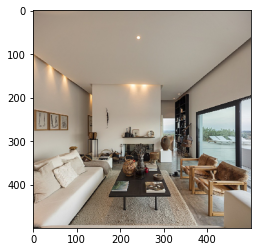

Not Hot Dog


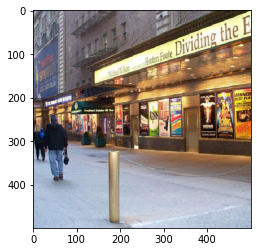

Hot Dog


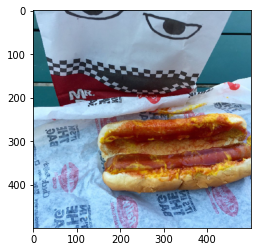

In [ ]:
for i in range(5):
  preview_img_randomly()

## Split Dataset

In [ ]:
df.head()

,path,extension,height,width,tags,removed,timestamp,local_path
0,data/1.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/1.jpg
1,data/2.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/2.jpg
2,data/3.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/3.jpg
3,data/4.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/4.jpg
4,data/5.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/5.jpg


In [ ]:
df.tags.value_counts()

Not Hot Dog    440
Hot Dog        291
Name: tags, dtype: int64

In [ ]:
import math
label_col = 'tags' # output -> y
x_col = 'local_path' # input -> X

In [ ]:
dfs_for_train = []
dfs_for_valid = []
val_counts = df[label_col].value_counts()
split_percent = 0.25

for label, count in val_counts.items():
  # print(label, count)
  lower_half = math.floor(count * (1 - split_percent))
  upper_half = math.ceil(count * (split_percent))
  # print(lower_half, upper_half)
  sub_df = df.copy()
  sub_df = sub_df[sub_df[label_col]==label] # all matches of "Hot Dog"
  sub_df = sub_df.sample(frac=1).reset_index(drop=True)
  sub_train_df = sub_df[:lower_half]
  sub_valid_df = sub_df[lower_half:]
  dfs_for_train.append(sub_train_df)
  dfs_for_valid.append(sub_valid_df)

In [ ]:
df_train = pd.concat(dfs_for_train)
df_valid = pd.concat(dfs_for_valid)

In [ ]:
df_train.tail(n=10)

,path,extension,height,width,tags,removed,timestamp,local_path
208,data/9.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/9.jpg
209,data/97.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/97.jpg
210,data/142.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/142.jpg
211,data/179.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/179.jpg
212,data/168.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/168.jpg
213,data/236.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/236.jpg
214,data/68.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/68.jpg
215,data/173.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/173.jpg
216,data/256.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/256.jpg
217,data/291.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/291.jpg


## What's in the Data?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


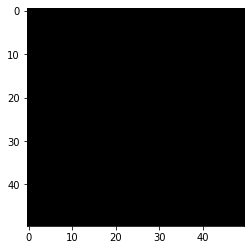

In [ ]:
my_array = np.zeros((50, 50, 3))  # 50 pixels x 50 pixels x 3 color values (RGB, BGR)
plt.imshow(my_array)
plt.show()

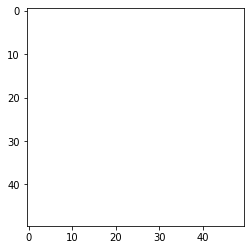

In [ ]:
my_other_array = my_array + 1
plt.imshow(my_other_array)
plt.show()

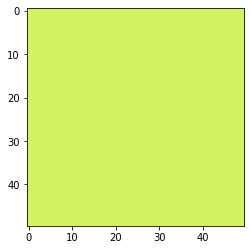

In [ ]:
import random
random_rgb = [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)] # RGB
my_other_other_array = my_other_array * (np.array(random_rgb) / 255.0)
plt.imshow(my_other_other_array)
plt.show()

In [ ]:
my_other_other_array

array([[[0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        ...,
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373]],

       [[0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        ...,
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373]],

       [[0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        ...,
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373]],

       ...,

       [[0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0.94901961, 0.38431373],
        [0.82352941, 0

In [ ]:
500 * 500 * 3 * 10000

7500000000

## Using Pre-Trained Model

https://keras.io/api/applications/

In [ ]:
def get_img_path_randomly():
    random_row = df.sample()
    local_random_img_path = random_row['local_path'].values[0]
    local_random_img_tag = random_row['tags'].values[0]
    pil_img = Image.open(local_random_img_path)
    img_array = np.asarray(pil_img)
    print(local_random_img_tag)
    plt.imshow(img_array)
    plt.show()
    return local_random_img_path

Not Hot Dog


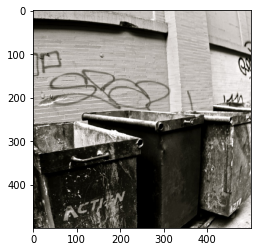

In [ ]:
img_path = get_img_path_randomly()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
preds = model.predict(x)

In [ ]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02747177', 'ashcan', 0.98757267), ('n02909870', 'bucket', 0.0070798737), ('n03127925', 'crate', 0.0016111105)]


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## Our Model
Convolutional Neural Network (CNN)
- Code [Ref](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

In [ ]:
def predict(img_path):
  # some prediction
  return "hot dog" # or "not hot dog" 39%

In [ ]:
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [ ]:
img_width, img_height = 224, 224
output_classes = 2

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(img_width, img_height ,3)))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_classes, activation='softmax'))

model.compile(RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 64)      1

## Image Preprocessing Data Generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
x_col = 'local_path'
y_col = 'tags'

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col=x_col,
    y_col=y_col,
    class_mode='categorical',
    target_size = (img_width, img_height),
    batch_size=32
)


Found 546 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2 invalid image filename(s) in x_col="local_path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = valid_datagen.flow_from_dataframe(
    dataframe=df_valid,
    x_col=x_col,
    y_col=y_col,
    class_mode='categorical',
    target_size = (img_width, img_height),
    batch_size=32
)

Found 183 validated image filenames belonging to 2 classes.


## Train our Model

In [ ]:
EPOCHS = 10
steps_per_epoch = training_generator.n // training_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

In [ ]:
model.fit(
    x=training_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

# model.fit_generator(generator=train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=10)

Epoch 1/10
17/17 [==============================] - 11s 671ms/step - loss: 5.9793 - accuracy: 0.5875 - val_loss: 6.0390 - val_accuracy: 0.6062
Epoch 2/10
17/17 [==============================] - 12s 679ms/step - loss: 6.2346 - accuracy: 0.5934 - val_loss: 6.3619 - val_accuracy: 0.5813
Epoch 3/10
17/17 [==============================] - 11s 666ms/step - loss: 3.3160 - accuracy: 0.5973 - val_loss: 0.6201 - val_accuracy: 0.6750
Epoch 4/10
17/17 [==============================] - 11s 654ms/step - loss: 0.5657 - accuracy: 0.7237 - val_loss: 0.4801 - val_accuracy: 0.7937
Epoch 5/10
17/17 [==============================] - 11s 659ms/step - loss: 0.4203 - accuracy: 0.8230 - val_loss: 0.4010 - val_accuracy: 0.8438
Epoch 6/10
17/17 [==============================] - 11s 657ms/step - loss: 0.3883 - accuracy: 0.8619 - val_loss: 0.4197 - val_accuracy: 0.8313
Epoch 7/10
17/17 [==============================] - 11s 652ms/step - loss: 0.3582 - accuracy: 0.8677 - val_loss: 0.4875 - val_accuracy: 0.7625

## Exporting Model (Saving)

#### Save To Colab
Remember, colab is ephemeral so files saved here will only be available temporarily.

In [ ]:
model.save('hotdog-v-not-hot-dog.h5')

#### Save To Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
DRIVE_ROOT_PATH = BASE_DIR / "drive" / "My Drive"
DRIVE_ROOT_PATH.exists()

True

In [ ]:
output_project_dir = DRIVE_ROOT_PATH / "try-keras" / "projects" / "hot-dog-v-not-hot-dog"
output_project_dir.mkdir(parents=True, exist_ok=True)

In [ ]:
model.save(output_project_dir / 'hotdog-v-not-hot-dog.h5')

In [ ]:
# s3, google storage

## Prediction on Custom Trained Model

In [ ]:
def get_img_randomly():
    random_row = df.sample()
    local_random_img_path = random_row['local_path'].values[0]
    local_random_img_tag = random_row['tags'].values[0]
    pil_img = Image.open(local_random_img_path)
    img_array = np.asarray(pil_img)
    print(local_random_img_tag)
    plt.imshow(img_array)
    plt.show()
    return local_random_img_path, local_random_img_tag

Not Hot Dog


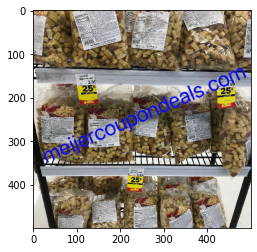

In [ ]:
local_random_img_path, local_random_img_tag = get_img_randomly()

In [ ]:
from keras.preprocessing import image as k_image

img = k_image.load_img(
    local_random_img_path,
    target_size = (img_width, img_height)
)
img_array = k_image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)
img_array /= 255.0

predictions = model.predict(img_array)
print(predictions)

[[0.36095974 0.6390403 ]]


In [ ]:
metadata = {
    "classes": training_generator.class_indices,
    "index_vals": {v:k for k,v in training_generator.class_indices.items()},
    "image": {
        "width": img_width,
        "height": img_height
    }
}
metadata

{'classes': {'Hot Dog': 0, 'Not Hot Dog': 1},
 'image': {'height': 224, 'width': 224},
 'index_vals': {0: 'Hot Dog', 1: 'Not Hot Dog'}}

## Model Prediction Function

In [ ]:
def preds_to_dict(predictions):
  final_preds = list(predictions[0])
  preds_dict = {}
  for i, val in enumerate(final_preds):
      label_name = metadata['index_vals'][i]
      preds_dict[label_name] = val
  return preds_dict

def predict(img_path):
  image_data = metadata.get('image') or {}
  img_width = image_data.get("width") or 224
  img_height = image_data.get("height") or 224
  img = k_image.load_img(
      img_path,
      target_size = (img_width, img_height)
  )
  img_array = k_image.img_to_array(img)
  img_array = np.expand_dims(img_array, 0)
  img_array /= 255.0
  predictions = model.predict(img_array)
  return preds_to_dict(predictions)

Not Hot Dog


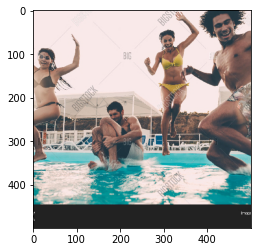

In [ ]:
local_random_img_path, local_random_img_tag = get_img_randomly()

In [ ]:
predict(local_random_img_path)

{'Hot Dog': 0.23430076, 'Not Hot Dog': 0.7656992}

## Storing Model Metadata

In [ ]:
metadata = {
    "classes": training_generator.class_indices,
    "index_vals": {v:k for k,v in training_generator.class_indices.items()},
    "image": {
        "width": img_width,
        "height": img_height
    }
}
output_project_dir

PosixPath('/content/drive/My Drive/try-keras/projects/hot-dog-v-not-hot-dog')

In [ ]:
import json

with open(output_project_dir / 'metadata.json', 'w') as f:
    f.write(json.dumps(metadata, indent=4))

In [ ]:

with open('metadata.json', 'w') as f:
    f.write(json.dumps(metadata, indent=4))

In [ ]:
with open(output_project_dir / 'metadata.json', 'r') as f:
    print(f.read())

{
    "classes": {
        "Hot Dog": 0,
        "Not Hot Dog": 1
    },
    "index_vals": {
        "0": "Hot Dog",
        "1": "Not Hot Dog"
    },
    "image": {
        "width": 224,
        "height": 224
    }
}


## Create a Reusable Module for Prediction (Inference)

In [ ]:
%%writefile predict.py

import sys
import json
import numpy as np
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image as k_image
# from keras.models import load_model 
# from keras.preprocessing import image as k_image

MODEL_OBJ = None
MODEL_METADATA = {}

def load_my_model():
    global MODEL_OBJ
    global MODEL_METADATA
    MODEL_OBJ = load_model('hotdog-v-not-hot-dog.h5', compile=False)
    with open('metadata.json', 'r') as f:
        MODEL_METADATA = json.loads(f.read())
    return MODEL_OBJ, MODEL_METADATA

def preds_to_dict(predictions, metadata={}):
  final_preds = list(predictions[0])
  preds_dict = {}
  for i, val in enumerate(final_preds):
      label_name = metadata['index_vals'][f"{i}"]
      preds_dict[label_name] = val
  return preds_dict

def predict(img_path):
  global MODEL_OBJ
  global MODEL_METADATA
  if MODEL_OBJ == None:
     MODEL_OBJ, MODEL_METADATA = load_my_model()
  print(MODEL_OBJ, MODEL_METADATA)
  image_data = MODEL_METADATA.get('image') or {}
  img_width = image_data.get("width") or 224
  img_height = image_data.get("height") or 224
  img = k_image.load_img(
      img_path,
      target_size = (img_width, img_height)
  )
  img_array = k_image.img_to_array(img)
  img_array = np.expand_dims(img_array, 0)
  img_array /= 255.0
  predictions = MODEL_OBJ.predict(img_array)
  return preds_to_dict(predictions, metadata=MODEL_METADATA)


if __name__ == "__main__":
     local_img_path = sys.argv[1]
     if local_img_path:
        my_pred = predict(local_img_path)
        print(my_pred)

Overwriting predict.py


In [ ]:
test_img = pathlib.Path('hot-dog-v-not-hot-dog') / "data" / "1.jpg"

In [ ]:
!echo $test_img

hot-dog-v-not-hot-dog/data/1.jpg


In [ ]:
!python predict.py $test_img

2020-08-14 04:17:35.703653: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-14 04:17:37.341494: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-14 04:17:37.344454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-14 04:17:37.344918: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-08-14 04:17:37.344981: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-14 04:17:37.346858: I tensorflow/stream_executor/platform/defa

## Create a Reusable Training Module

## Export Entire Project to Google Drive